## Load CSV File, Clean & Organize Data

In [1]:
# Dependencies And Setup
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st
# import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [2]:
# File Path To Target CSV File
diabetes_data_to_load = Path("Resources/diabetes_prediction_dataset.csv")

# Reading Of Diabetes CSV Data File, Storage In Pandas DataFrame
diabetes_data = pd.read_csv(diabetes_data_to_load)

# Display DataFrame
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Renaming Columns
diabetes_data.rename(columns={"gender": "Gender",
                              "age": "Age",
                              "hypertension": "Hypertension Status",
                              "heart_disease": "Heart Disease Status",
                              "smoking_history": "Smoking History",
                              "bmi": "Body Mass Index",
                              "HbA1c_level": "HbA1c (%)",
                              "blood_glucose_level": "Blood Glucose Level",
                              "diabetes": "Diabetes Status"
                              }, inplace=True)
diabetes_data.head()

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c (%),Blood Glucose Level,Diabetes Status
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Data Type Discovery & Null Count Investigation For Columns
diabetes_data.info()

# No Null Values, But Still Need To Check Columns For Appropriate Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                100000 non-null  object 
 1   Age                   100000 non-null  float64
 2   Hypertension Status   100000 non-null  int64  
 3   Heart Disease Status  100000 non-null  int64  
 4   Smoking History       100000 non-null  object 
 5   Body Mass Index       100000 non-null  float64
 6   HbA1c (%)             100000 non-null  float64
 7   Blood Glucose Level   100000 non-null  int64  
 8   Diabetes Status       100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Check Values Within Age Column
diabetes_data["Age"].value_counts()

Age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [6]:
# Check Values Within Body Mass Index Column
diabetes_data["Body Mass Index"].value_counts()

Body Mass Index
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64

In [7]:
# Check Values Within HbA1c Level Column
diabetes_data["HbA1c (%)"].value_counts()

HbA1c (%)
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [8]:
# Check Values Within Blood Glucose Level Column
diabetes_data["Blood Glucose Level"].value_counts()

Blood Glucose Level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [9]:
# Check Values Within Gender Column
print(diabetes_data["Gender"].value_counts())

# Check Values Within Hypertension Column
print(diabetes_data["Hypertension Status"].value_counts())

#Check Values Within Heart Disease Status Column
print(diabetes_data["Heart Disease Status"].value_counts())

#Check Values Within Diabetes Status Column
print(diabetes_data["Diabetes Status"].value_counts())

#Check Values Within Smoking History Column
print(diabetes_data["Smoking History"].value_counts())

Gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
Hypertension Status
0    92515
1     7485
Name: count, dtype: int64
Heart Disease Status
0    96058
1     3942
Name: count, dtype: int64
Diabetes Status
0    91500
1     8500
Name: count, dtype: int64
Smoking History
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [10]:
# Clean Smoking History Column For Repeats
diabetes_data["Smoking History"] = diabetes_data["Smoking History"].replace(
    {"No Info": "N/A",
     "never": "Never",
     "former": "Former",
     "current": "Current",
     "not current": "Former",
     "ever": "Never"
     })

# Display DataFrame
diabetes_data.head()

,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c (%),Blood Glucose Level,Diabetes Status
0,Female,80.0,0,1,Never,25.19,6.6,140,0
1,Female,54.0,0,0,N/A,27.32,6.6,80,0
2,Male,28.0,0,0,Never,27.32,5.7,158,0
3,Female,36.0,0,0,Current,23.45,5.0,155,0
4,Male,76.0,1,1,Current,20.14,4.8,155,0


In [11]:
# Creation Of Quartiles For "Age" Column (Quartile Labels: A1, A2, A3, A4)
diabetes_data["Age Quartiles"], cutoffs = pd.qcut(diabetes_data["Age"], q=4, labels=["A1", "A2", "A3", "A4"], retbins=True)

# Print Cutoffs For Each Age Quartile
print("Quartile Cutoffs: ", cutoffs)
print("\nA1: 0.08-24\n"
      "A2: 24-43\n"
      "A3: 43-60\n"
      "A4: 60-80\n")

diabetes_data.head()

Quartile Cutoffs:  [ 0.08 24.   43.   60.   80.  ]

A1: 0.08-24
A2: 24-43
A3: 43-60
A4: 60-80



,Gender,Age,Hypertension Status,Heart Disease Status,Smoking History,Body Mass Index,HbA1c (%),Blood Glucose Level,Diabetes Status,Age Quartiles
0,Female,80.0,0,1,Never,25.19,6.6,140,0,A4
1,Female,54.0,0,0,N/A,27.32,6.6,80,0,A3
2,Male,28.0,0,0,Never,27.32,5.7,158,0,A2
3,Female,36.0,0,0,Current,23.45,5.0,155,0,A2
4,Male,76.0,1,1,Current,20.14,4.8,155,0,A4


## Visualization of Raw Data Prior to Processing/Analysis

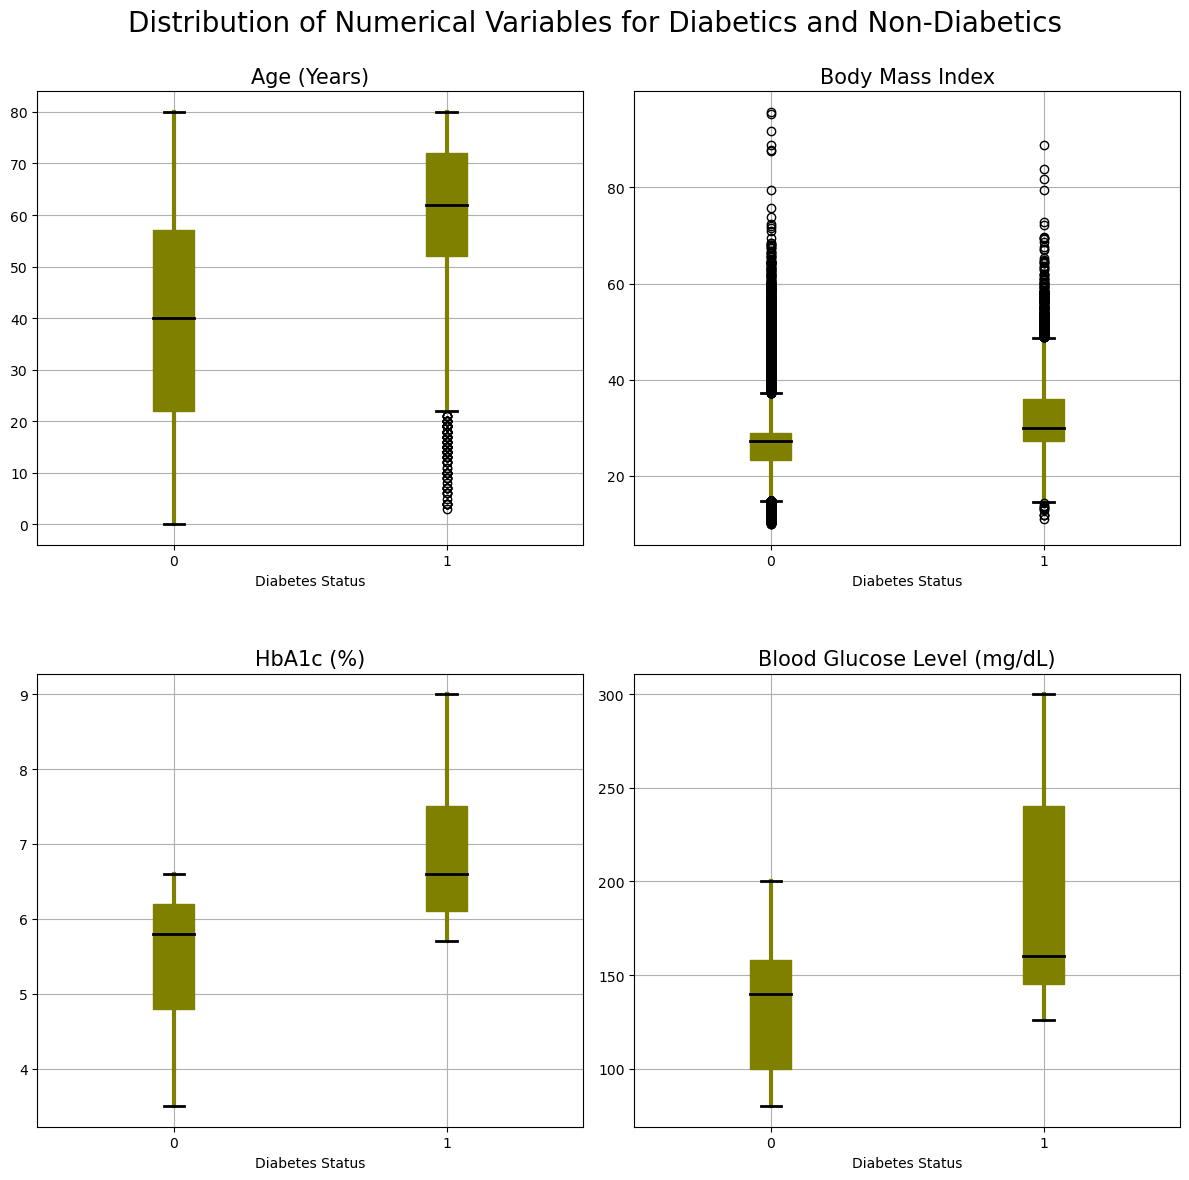

In [12]:
# Create Grid For Set Of Subplots (Box Plots)
fig_n, axes_n = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Customize Subplot For Diabetes Status vs. Age
diabetes_data.boxplot(column='Age', by='Diabetes Status',
                      grid=True, ax=axes_n[0, 0], patch_artist=True, color='olive',
                      medianprops=dict(color='black', linewidth=2),
                      capprops=dict(color='black', linewidth=2),
                      whiskerprops=dict(color='olive', linewidth=3))
axes_n[0, 0].set_title('Age (Years)', fontsize=15)

# Customize Subplot For Diabetes Status vs. Body Mass Index
diabetes_data.boxplot(column='Body Mass Index', by='Diabetes Status',
                      grid=True, ax=axes_n[0, 1], patch_artist=True, color='olive',
                      medianprops=dict(color='black', linewidth=2),
                      capprops=dict(color='black', linewidth=2),
                      whiskerprops=dict(color='olive', linewidth=3))
axes_n[0, 1].set_title('Body Mass Index', fontsize=15)

# Customize Subplot For Diabetes Status vs. HbA1c Percentage
diabetes_data.boxplot(column='HbA1c (%)', by='Diabetes Status',
                      grid=True, ax=axes_n[1, 0], patch_artist=True, color='olive',
                      medianprops=dict(color='black', linewidth=2),
                      capprops=dict(color='black', linewidth=2),
                      whiskerprops=dict(color='olive', linewidth=3))
axes_n[1, 0].set_title('HbA1c (%)', fontsize=15)

# Customize Subplot For Diabetes Status vs. Blood Glucose Level (Glucose Tolerance Test)
diabetes_data.boxplot(column='Blood Glucose Level', by='Diabetes Status',
                      grid=True, ax=axes_n[1, 1], patch_artist=True, color='olive',
                      medianprops=dict(color='black', linewidth=2),
                      capprops=dict(color='black', linewidth=2),
                      whiskerprops=dict(color='olive', linewidth=3))
axes_n[1, 1].set_title('\n\nBlood Glucose Level (mg/dL)', fontsize=15)

# Create Figure Title And Adjust The Layout
plt.suptitle('Distribution of Numerical Variables for Diabetics and Non-Diabetics', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, .98])

# Save figure
plt.savefig("output_data/raw_data_vis_boxplot.png")

# Display The Figure And Set Of Subplots
plt.show()

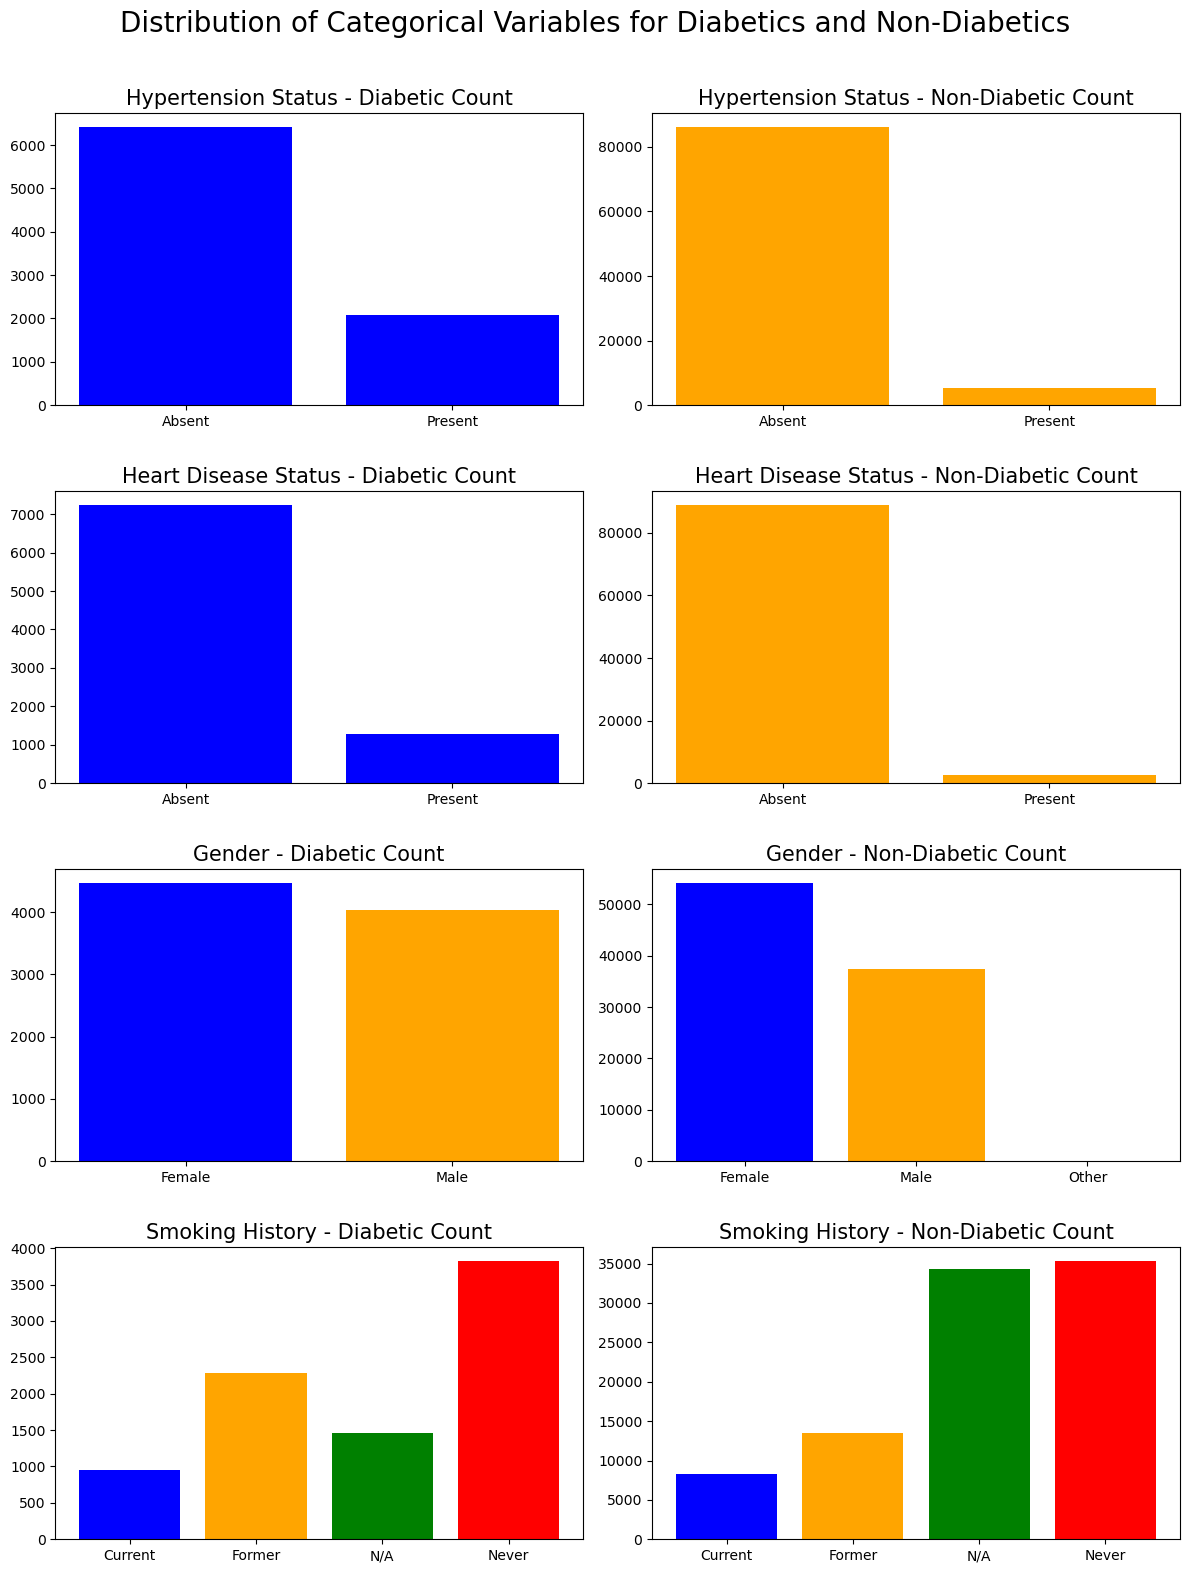

In [13]:
# Create Grid For Set Of Subplots
fig_c, axes_c = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Filter DataFrame For Diabetics And Non-Diabetics (Will Be Useful Later)
diabetes_data_diabetes = diabetes_data[diabetes_data['Diabetes Status'] == 1]
diabetes_data_no_diabetes = diabetes_data[diabetes_data['Diabetes Status'] == 0]

# Setup To Map Hypertension & Heart Disease To Labels (0 = Absent & 1 = Present)
htn_hd_label_mapping = {0: 'Absent', 1: 'Present'}

# Plot Hypertension Status - Diabetics
counts_diabetes_hypertension = diabetes_data_diabetes['Hypertension Status'].value_counts().sort_index()
counts_diabetes_hypertension.index = counts_diabetes_hypertension.index.map(htn_hd_label_mapping)
axes_c[0, 0].bar(counts_diabetes_hypertension.index, counts_diabetes_hypertension, color='blue')
axes_c[0, 0].set_title('Hypertension Status - Diabetic Count', fontsize=15)

# Plot Hypertension Status - Non-Diabetics
counts_no_diabetes_hypertension = diabetes_data_no_diabetes['Hypertension Status'].value_counts().sort_index()
counts_no_diabetes_hypertension.index = counts_no_diabetes_hypertension.index.map(htn_hd_label_mapping)
axes_c[0, 1].bar(counts_no_diabetes_hypertension.index, counts_no_diabetes_hypertension, color='orange')
axes_c[0, 1].set_title('Hypertension Status - Non-Diabetic Count', fontsize=15)

# Plot Heart Disease Status - Diabetics
counts_diabetes_heart_disease = diabetes_data_diabetes['Heart Disease Status'].value_counts().sort_index()
counts_diabetes_heart_disease.index = counts_diabetes_heart_disease.index.map(htn_hd_label_mapping)
axes_c[1, 0].bar(counts_diabetes_heart_disease.index, counts_diabetes_heart_disease, color='blue')
axes_c[1, 0].set_title('\nHeart Disease Status - Diabetic Count', fontsize=15)

# Plot Heart Disease Status - Non-Diabetics
counts_no_diabetes_heart_disease = diabetes_data_no_diabetes['Heart Disease Status'].value_counts().sort_index()
counts_no_diabetes_heart_disease.index = counts_no_diabetes_heart_disease.index.map(htn_hd_label_mapping)
axes_c[1, 1].bar(counts_no_diabetes_heart_disease.index, counts_no_diabetes_heart_disease, color='orange')
axes_c[1, 1].set_title('Heart Disease Status - Non-Diabetic Count', fontsize=15)

# Plot Gender - Diabetics
counts_diabetes_gender = diabetes_data_diabetes['Gender'].value_counts().sort_index()
axes_c[2, 0].bar(counts_diabetes_gender.index, counts_diabetes_gender, color=['blue', 'orange', 'green'])
axes_c[2, 0].set_title('Gender - Diabetic Count', fontsize=15)

# Plot Gender - Non-Diabetics
counts_no_diabetes_gender = diabetes_data_no_diabetes['Gender'].value_counts().sort_index()
axes_c[2, 1].bar(counts_no_diabetes_gender.index, counts_no_diabetes_gender, color=['blue', 'orange', 'green'])
axes_c[2, 1].set_title('Gender - Non-Diabetic Count', fontsize=15)

# Plot Smoking History - Diabetics
counts_diabetes_smoking = diabetes_data_diabetes['Smoking History'].value_counts().sort_index()
axes_c[3, 0].bar(counts_diabetes_smoking.index, counts_diabetes_smoking, color=['blue', 'orange', 'green', 'red'])
axes_c[3, 0].set_title('Smoking History - Diabetic Count', fontsize=15)

# Plot Smoking History - Non-Diabetics
counts_no_diabetes_smoking = diabetes_data_no_diabetes['Smoking History'].value_counts().sort_index()
axes_c[3, 1].bar(counts_no_diabetes_smoking.index, counts_no_diabetes_smoking, color=['blue', 'orange', 'green', 'red'])
axes_c[3, 1].set_title('Smoking History - Non-Diabetic Count', fontsize=15)

# Create Figure Title And Adjust The Layout
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.suptitle('Distribution of Categorical Variables for Diabetics and Non-Diabetics', fontsize=20)

# Save figure
plt.savefig("output_data/variable_distribution_dibaetic_non.png")

# Display The Figure And Set Of Subplots
plt.show()

In [14]:
# Take Data From Above Grid Of Bar Charts & Create Data Frame For Easier Manipulation Later

# Utilize pd.crosstab To Get Count Of Occurences For Each Combination Of Diabetes Status & Gender
gender_counts = pd.crosstab(diabetes_data['Diabetes Status'], diabetes_data['Gender'])

# Utilize pd.crosstab To Get Count Of Occurences For Each Combination Of Diabetes Status & Smoking History
smoking_history_counts = pd.crosstab(diabetes_data['Diabetes Status'], diabetes_data['Smoking History'])

# Group By "Diabetes Status" & Calculate Counts For Other Categorical Variables
grouped_count_data = diabetes_data.groupby('Diabetes Status').agg({
    'Hypertension Status': 'sum',
    'Heart Disease Status': 'sum'
})

# Concatenate Gender Counts & Smoking History With Grouped Data
grouped_count_data = pd.concat([grouped_count_data, gender_counts], axis=1)
grouped_count_data = pd.concat([grouped_count_data, smoking_history_counts], axis=1)

# Rename Columns
grouped_count_data.columns = ['Hypertension',
                              'Heart Disease',
                              'Female',
                              'Male',
                              'Other',
                              'Current Smoker',
                              'Former Smoker',
                              'Smoking N/A',
                              'Never Smoker']

# Display DataFrame
del grouped_count_data["Smoking N/A"]
grouped_count_data.index.name = 'Diabetes Status'
grouped_count_data

,Hypertension,Heart Disease,Female,Male,Other,Current Smoker,Former Smoker,Never Smoker
Diabetes Status,,,,,,,,
0,5397,2675,54091,37391,18,8338,13519,35281
1,2088,1267,4461,4039,0,948,2280,3818


## Visualization of Correlation Matrices to Guide Hypothesis Testing

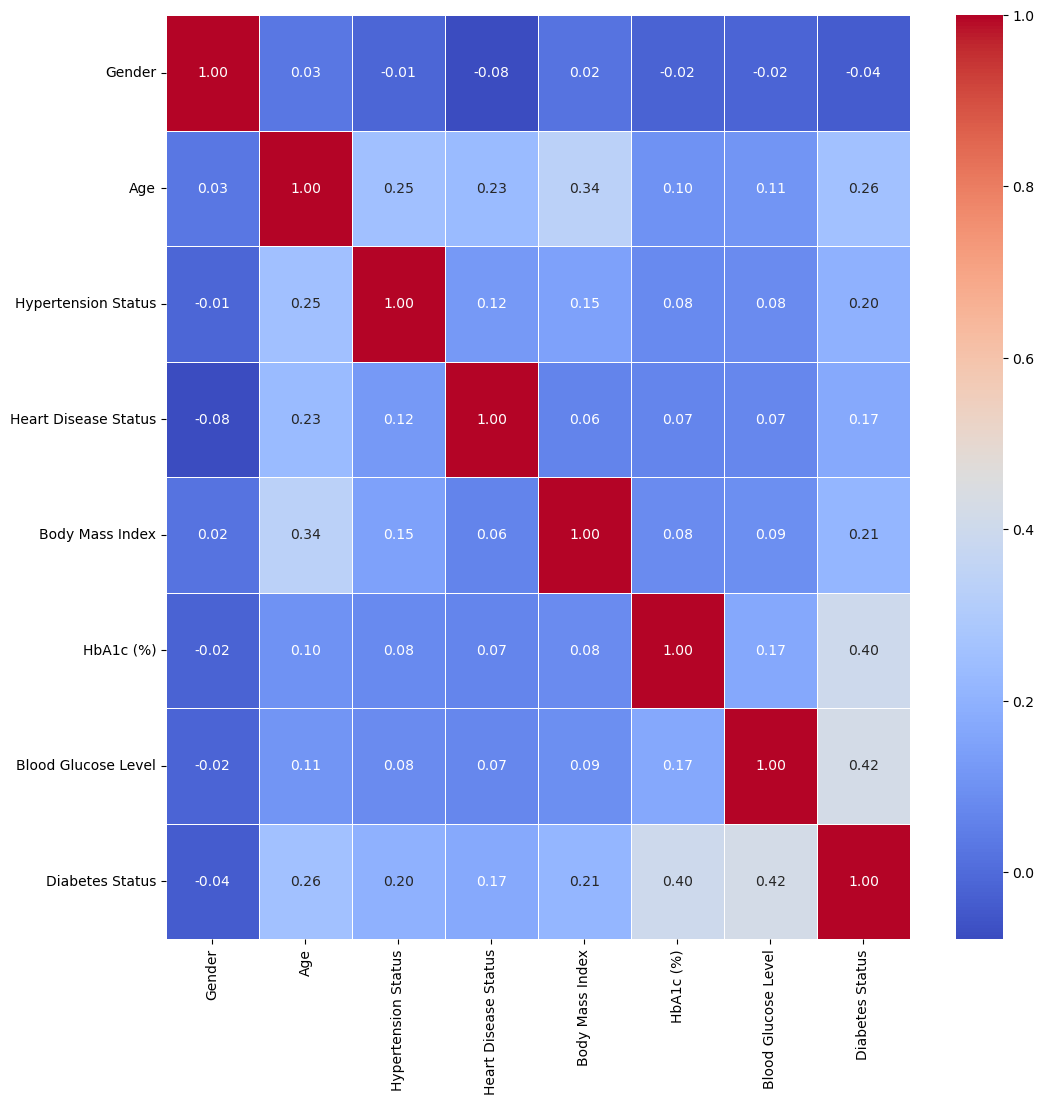

In [15]:
# Create Orignial Diabetes DataFrame Copy For Correlation Matrix
correlation_diabetes_data_without_smoking = diabetes_data.copy()
del correlation_diabetes_data_without_smoking["Age Quartiles"]

# Correlation Matrix Is Not Compatible With Categorical Variables, Need Conversion To Numeric
# However, Smoking History Is Problematic, Removed & Expalantion In Next Cell
del correlation_diabetes_data_without_smoking["Smoking History"]

# Map "Gender" To Numeric Values; This Is Label Encoding
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
correlation_diabetes_data_without_smoking['Gender'] = correlation_diabetes_data_without_smoking['Gender'].map(gender_mapping)

# Calculate Correlation Matrix
correlation_matrix_without_smoking = correlation_diabetes_data_without_smoking.corr()

# Conditional Formatting Of Correlation Matrix, Easier To Read
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix_without_smoking, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Save figure
plt.savefig("output_data/correlation_matrix.png")

# Display Correlation Matrix
plt.show()

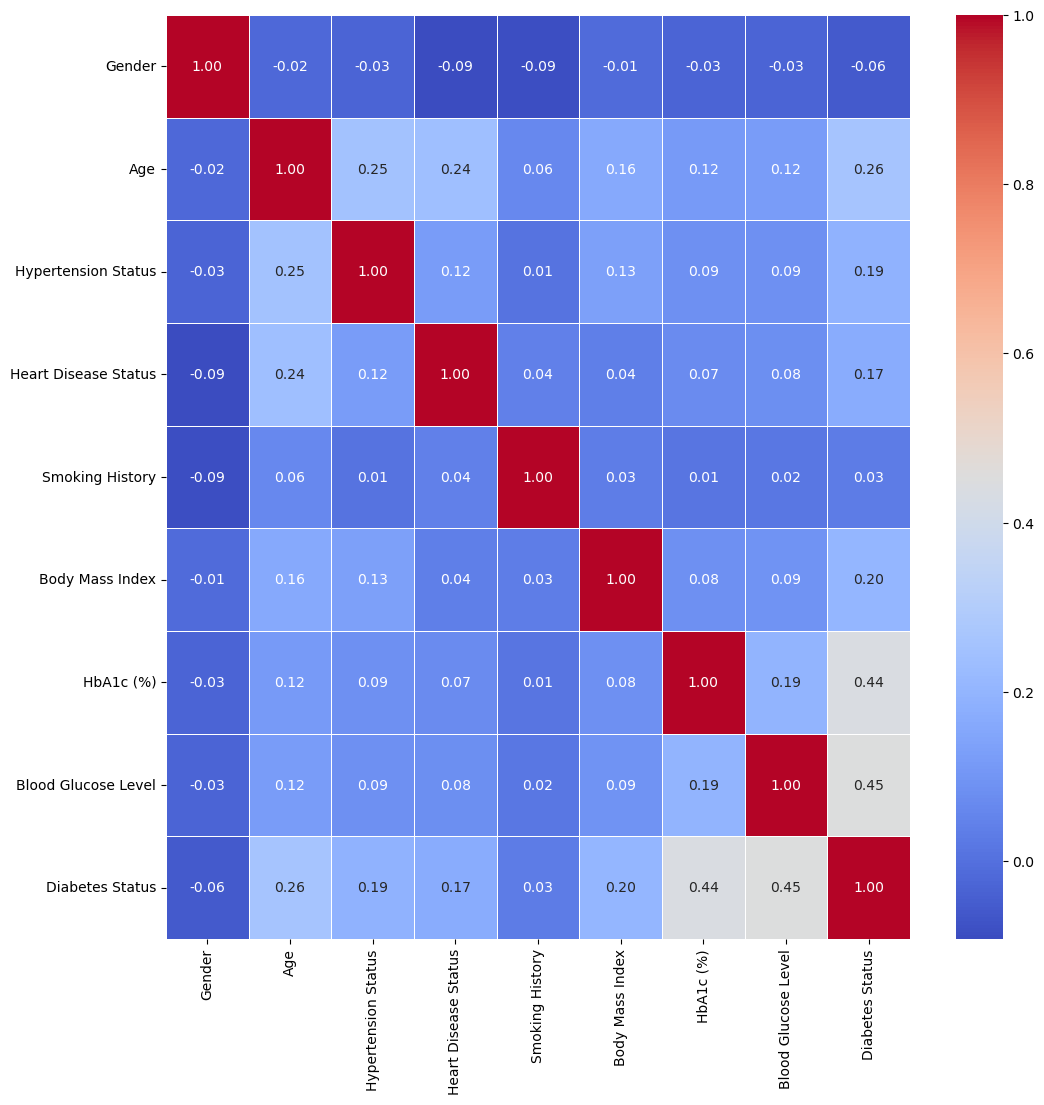

In [16]:
# Explanation For Deletion Of Smoking History In Correlation Matrix, Let's Visualize Why

# Create Original DataFrame Copy For Correlation Matrix
correlation_diabetes_data_smoking = diabetes_data.copy()
del correlation_diabetes_data_smoking["Age Quartiles"]

# Remove Rows Where "Smoking History" Is N/A, Presence Of N/A Will Distort The Correlation We Want To See
correlation_diabetes_data_smoking = correlation_diabetes_data_smoking[correlation_diabetes_data_smoking['Smoking History'] != 'N/A']

# Map "Gender" To Numeric Values, This Is Label Encoding
gender_mapping2 = {'Male': 0, 'Female': 1, 'Other': 2}
correlation_diabetes_data_smoking['Gender'] = correlation_diabetes_data_smoking['Gender'].map(gender_mapping2)

# Map "Smoking History" To Numeric Values, This Is Label Encoding
smoking_mapping = {'Never': 0, 'Former': 1, 'Current': 2}
correlation_diabetes_data_smoking['Smoking History'] = correlation_diabetes_data_smoking['Smoking History'].map(smoking_mapping)

# Calculate Correlation Matrix
correlation_matrix_with_smoking = correlation_diabetes_data_smoking.corr()

# Conditional Formatting Of Correlation Matrix
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix_with_smoking, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Save figure
plt.savefig("output_data/correlation_matrix_plus_smoking.png")

# Display Correlation Matrix
plt.show()

# This Shows Removing N/A Rows Removes A Lot Of Data & Distorts Our Correlation Matrix, Manual Calcuations Better
# Also, Correlation Matrices Are Best Suited For Numerical Continous Data, So This While Flawed Just Helps Guide Hypothesis Testing

## Relationship of Diabetes Status with Hypertension & Heart Disease

### Question 1:
Is the likelihood of having either hypertension, heart disease, or both conditions significantly higher for diabetics compared to non-diabetics?

#### Null Hypothesis (H0):
The likelihood of having either hypertension, heart disease, or both conditions is the same for both diabetic and non-diabetic populations.

#### Alternative Hypothesis (H1):
The likelihood of having either hypertension, heart disease, or both conditions is significantly higher for diabetics compared to non-diabetics.

In [17]:
# Grouping To Obtain Desired Counts
grouping_diabetes_hd_htn = diabetes_data.groupby(["Diabetes Status"])[["Hypertension Status", "Heart Disease Status"]].value_counts()
grouping_diabetes_hd_htn

Diabetes Status  Hypertension Status  Heart Disease Status
0                0                    0                       83986
                 1                    0                        4839
                 0                    1                        2117
                 1                    1                         558
1                0                    0                        5503
                 1                    0                        1730
                 0                    1                         909
                 1                    1                         358
Name: count, dtype: int64

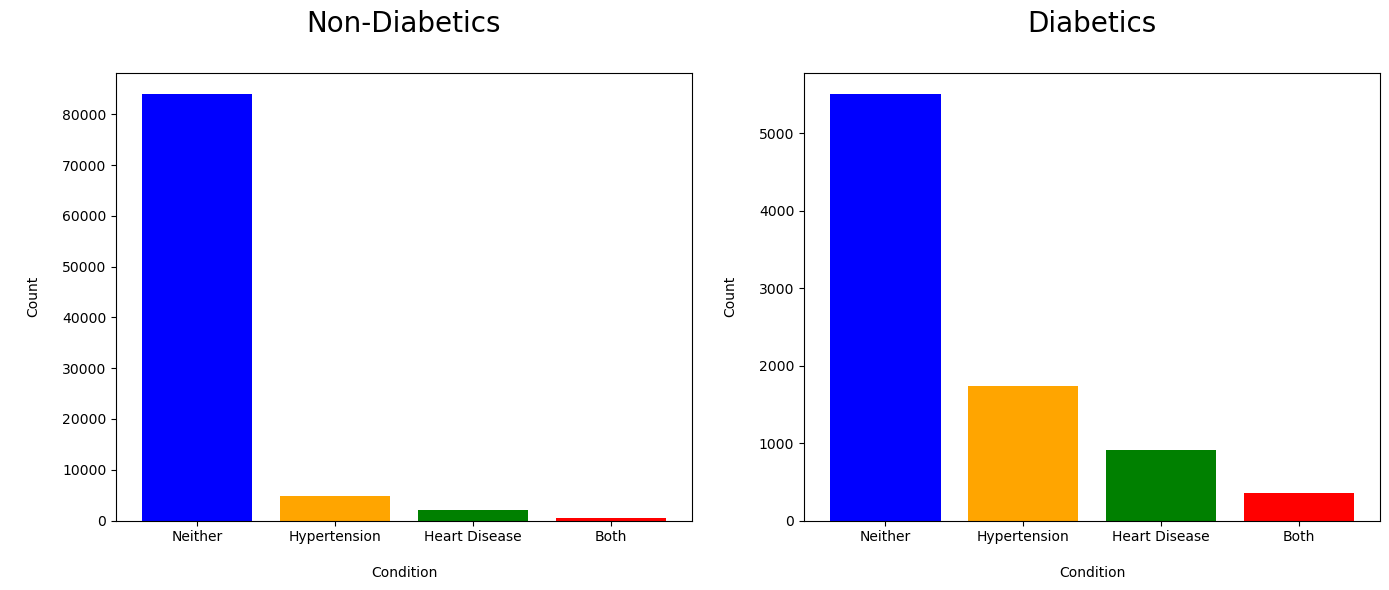

In [18]:
# Data For Non-Diabetics
x_ndiabetics_hd_htn = ['Neither', 'Hypertension', 'Heart Disease', 'Both']
y_ndiabetics_hd_htn = [83986, 4839, 2117, 558]

# Data For Diabetics
x_diabetics_hd_htn = ['Neither', 'Hypertension', 'Heart Disease', 'Both']
y_diabetics_hd_htn = [5503, 1730, 909, 358]

# Create Grid For Set Of Subplots
fig_hd_htn, axes_hd_htn = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Non-Diabetics Bar Plot
axes_hd_htn[0].bar(x_ndiabetics_hd_htn, y_ndiabetics_hd_htn, color=['blue', 'orange', 'green', 'red'], label='Non-Diabetics')
axes_hd_htn[0].set_title('Non-Diabetics\n', fontsize=20)
axes_hd_htn[0].set_xlabel('\nCondition')
axes_hd_htn[0].set_ylabel('\nCount\n')

# Diabetics Bar Plot
axes_hd_htn[1].bar(x_diabetics_hd_htn, y_diabetics_hd_htn, color=['blue', 'orange', 'green', 'red'], label='Non-Diabetics')
axes_hd_htn[1].set_title('Diabetics\n', fontsize=20)
axes_hd_htn[1].set_xlabel('\nCondition')
axes_hd_htn[1].set_ylabel('\nCount\n')

# Adjust Layout, Save, and Display Plots
plt.tight_layout()
plt.savefig("output_data/hypertention_heart_disease_barplot.png")
plt.show()

In [19]:
# To Test This Data For Significance, Use Z-Test Of Proportions

# Counts For Each Category For Diabetics & Non-Diabetics
count_diabetics_hd_htn = [5503, 1730, 909, 358]
count_non_diabetics_hd_htn = [83986, 4839, 2117, 558]

# Total Counts For Diabetics & Non-Diabetics Across All Categories
total_diabetics_hd_htn = sum(count_diabetics_hd_htn)
total_non_diabetics_hd_htn = sum(count_non_diabetics_hd_htn)

# Create NumPy Array From Counts For Each Category For Diabetics & Non-Diabetics
counts_hd_htn = np.array([count_diabetics_hd_htn, count_non_diabetics_hd_htn])

# Create NumPy Array From Total Counts For Diabetics & Non-Diabetics Across All Categories
nobs_hd_htn = np.array([total_diabetics_hd_htn, total_non_diabetics_hd_htn])

# Z-Test Of Proportions For Category: Neither Hypertension Nor Heart Disease
z_stat_nhd_nhtn, p_value_nhd_nhtn = proportions_ztest(counts_hd_htn[:, 0], nobs=nobs_hd_htn, alternative='smaller')
print(f"Z-statistic for 'No Hypertension & Heart Disease': {z_stat_nhd_nhtn}")
print(f"P-value: {p_value_nhd_nhtn}")
# Test Result: Proportion Of Diabetics Is Significantly Smaller Than Proportion Of Non-Diabetics

# Z-Test Of Proportions For Category: Hypertension
z_stat_htn, p_value_htn = proportions_ztest(counts_hd_htn[:, 1], nobs=nobs_hd_htn, alternative='larger')
print(f"\nZ-statistic for 'Hypertension Only': {z_stat_htn}")
print(f"P-value: {p_value_htn}")
# Test Result: Proportion Of Diabetics Is Significantly Larger Than Proportion Of Non-Diabetics

z_stat_hd, p_value_hd = proportions_ztest(counts_hd_htn[:, 2], nobs=nobs_hd_htn, alternative='larger')
print(f"\nZ-statistic for 'Heart Disease Only': {z_stat_hd}")
print(f"P-value: {p_value_hd}")
# Test Result: Proportion Of Diabetics Is Significantly Larger Than Proportion Of Non-Diabetics

z_stat_hd_htn, p_value_hd_htn = proportions_ztest(counts_hd_htn[:, 3], nobs=nobs_hd_htn, alternative='larger')
print(f"\nZ-statistic for 'Both Hypertension & Heart Disease': {z_stat_hd_htn}")
print(f"P-value: {p_value_hd_htn}")
# Test Result: Proportion Of Diabetics Is Significantly Larger Than Proportion Of Non-Diabetics

Z-statistic for 'No Hypertension & Heart Disease': -77.77304102647878
P-value: 0.0

Z-statistic for 'Hypertension Only': 53.62622146321058
P-value: 0.0

Z-statistic for 'Heart Disease Only': 43.14451252667288
P-value: 0.0

Z-statistic for 'Both Hypertension & Heart Disease': 33.34307215690896
P-value: 4.589844965633299e-244


In [20]:
# Visualization Of Z-Test Results

# Create Percentages For Diabetics
percentage_diabetics_nhd_nhtn = (5503 / total_diabetics_hd_htn) * 100
percentage_diabetics_htn = (1730 / total_diabetics_hd_htn) * 100
percentage_diabetics_hd = (909 / total_diabetics_hd_htn) * 100
percentage_diabetics_hd_htn = (358 / total_diabetics_hd_htn) * 100

# Create Percentages For Non-Diabetics
percentage_non_diabetics_nhd_nhtn = (83986 / total_non_diabetics_hd_htn) * 100
percentage_non_diabetics_htn = (4839 / total_non_diabetics_hd_htn) * 100
percentage_non_diabetics_hd = (2117 / total_non_diabetics_hd_htn) * 100
percentage_non_diabetics_hd_htn = (558 / total_non_diabetics_hd_htn) * 100

# Assemble Diabetic Percentages Into List
percentage_diabetics_list = [percentage_diabetics_nhd_nhtn,
                             percentage_diabetics_htn,
                             percentage_diabetics_hd,
                             percentage_diabetics_hd_htn]

# Assemble Non-Diabetic Percentages Into List
percentage_non_diabetics_list = [percentage_non_diabetics_nhd_nhtn,
                                 percentage_non_diabetics_htn,
                                 percentage_non_diabetics_hd,
                                 percentage_non_diabetics_hd_htn]

# Assemble Into DataFrame
percentage_hd_htn_df_index = ["No Hypertension & Heart Disease",
                              "Hypertension Only",
                              "Heart Disease Only",
                              "Both Hypertension & Heart Disease"]
percentage_hd_htn_df = pd.DataFrame({"Percentages For Diabetics": percentage_diabetics_list,
                                     "Percentages For Non-Diabetics": percentage_non_diabetics_list},
                                     index=percentage_hd_htn_df_index)
percentage_hd_htn_df.index.name = 'Categories'


# Display DataFrame
percentage_hd_htn_df

,Percentages For Diabetics,Percentages For Non-Diabetics
Categories,,
No Hypertension & Heart Disease,64.741176,91.787978
Hypertension Only,20.352941,5.288525
Heart Disease Only,10.694118,2.313661
Both Hypertension & Heart Disease,4.211765,0.609836


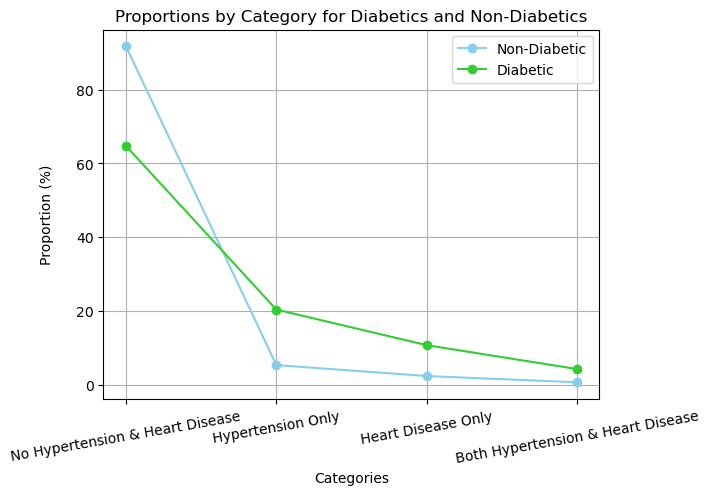

In [21]:
# Visualization Of Z-Test Results, Plot Creation
plt.plot(percentage_hd_htn_df_index, percentage_non_diabetics_list, label='Non-Diabetic', marker='o', color='skyblue')
plt.plot(percentage_hd_htn_df_index, percentage_diabetics_list, label='Diabetic', marker='o', color='limegreen')
plt.xlabel('Categories')
plt.xticks(rotation=10)
plt.ylabel('Proportion (%)\n')
plt.title('Proportions by Category for Diabetics and Non-Diabetics')
plt.legend()
plt.grid(True)
plt.savefig("output_data/percentage_by_category_ztest.png")
plt.show()

### Potential Limitation Here:
- Age shows correlation with both hypertension and heart disease, which could mean the closer correlation is with age rather than diabetes.

## Relationship of Diabetes Status and Age with BMI

### Question 2:
Are average Body Mass Index (BMI) levels significantly higher for individuals with diabetes, irrespective of age?

#### Null Hypothesis (H0):
There is no significant difference in average BMI levels between individuals with and without diabetes, irrespective of age.

#### Alternative Hypothesis (H1):
Average BMI levels are significantly higher for individuals with diabetes compared to those without diabetes, irrespective of age.

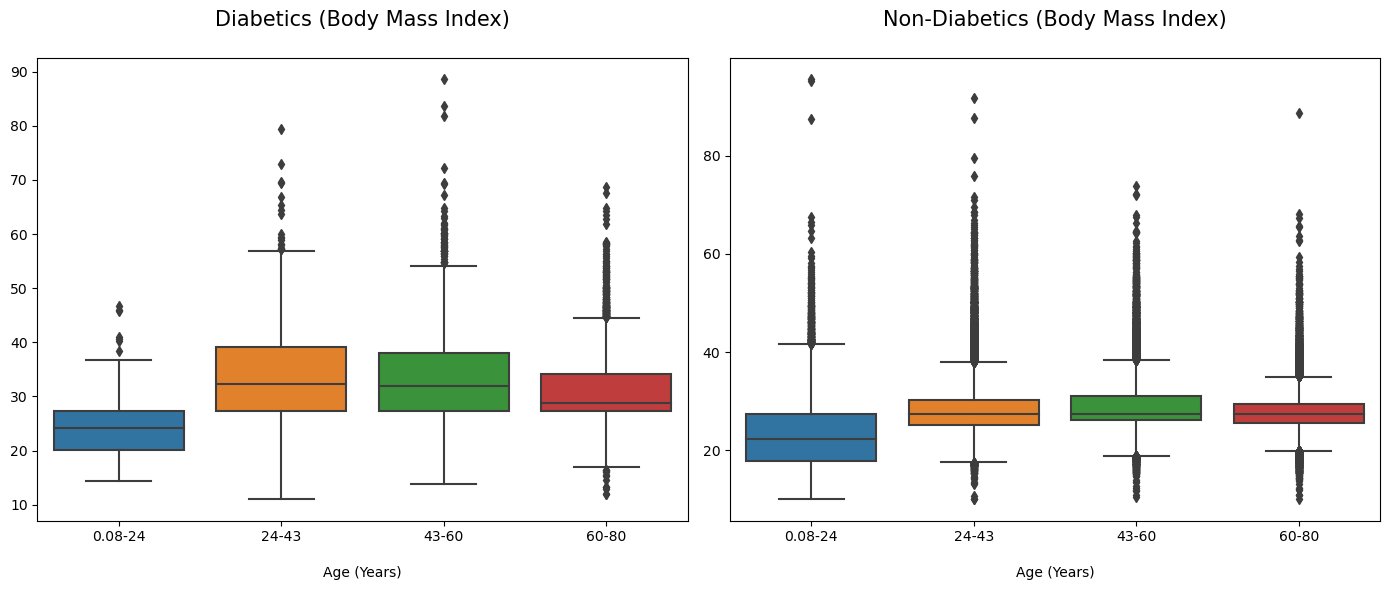

In [22]:
# Create Grid For Set Of Subplots
fig_diabetes_age_bmi, axes_diabetes_age_bmi = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
diabetes_age_bmi_labels = ['0.08-24',
                           '24-43',
                           '43-60',
                           '60-80']

# Box Plot For Diabetics
sns.boxplot(x='Age Quartiles', y='Body Mass Index', data=diabetes_data_diabetes, ax=axes_diabetes_age_bmi[0])
axes_diabetes_age_bmi[0].set_title('Diabetics (Body Mass Index)\n', fontsize=15)
axes_diabetes_age_bmi[0].set_xlabel('\nAge (Years)')
axes_diabetes_age_bmi[0].set_xticklabels(diabetes_age_bmi_labels)
axes_diabetes_age_bmi[0].set_ylabel('')

# Box Plot For Non-Diabetics
sns.boxplot(x='Age Quartiles', y='Body Mass Index', data=diabetes_data_no_diabetes, ax=axes_diabetes_age_bmi[1])
axes_diabetes_age_bmi[1].set_title('Non-Diabetics (Body Mass Index)\n', fontsize=15)
axes_diabetes_age_bmi[1].set_xlabel('\nAge (Years)')
axes_diabetes_age_bmi[1].set_xticklabels(diabetes_age_bmi_labels)
axes_diabetes_age_bmi[1].set_ylabel('')

# Adjust Layout, Save figure, & Display Plots
plt.tight_layout()
plt.savefig("output_data/body_mass_index_boxplots.png")
plt.show()

In [23]:
# BMI Lists For Each Age Quartile WITHOUT Diabetes
a1_ndiabetes_age_bmi = diabetes_data_no_diabetes.loc[diabetes_data_no_diabetes["Age Quartiles"] == "A1", "Body Mass Index"].tolist()
a2_ndiabetes_age_bmi = diabetes_data_no_diabetes.loc[diabetes_data_no_diabetes["Age Quartiles"] == "A2", "Body Mass Index"].tolist()
a3_ndiabetes_age_bmi = diabetes_data_no_diabetes.loc[diabetes_data_no_diabetes["Age Quartiles"] == "A3", "Body Mass Index"].tolist()
a4_ndiabetes_age_bmi = diabetes_data_no_diabetes.loc[diabetes_data_no_diabetes["Age Quartiles"] == "A4", "Body Mass Index"].tolist()

# BMI Lists For Each Age Quartile WITH Diabetes
a1_diabetes_age_bmi = diabetes_data_diabetes.loc[diabetes_data_diabetes["Age Quartiles"] == "A1", "Body Mass Index"].tolist()
a2_diabetes_age_bmi = diabetes_data_diabetes.loc[diabetes_data_diabetes["Age Quartiles"] == "A2", "Body Mass Index"].tolist()
a3_diabetes_age_bmi = diabetes_data_diabetes.loc[diabetes_data_diabetes["Age Quartiles"] == "A3", "Body Mass Index"].tolist()
a4_diabetes_age_bmi = diabetes_data_diabetes.loc[diabetes_data_diabetes["Age Quartiles"] == "A4", "Body Mass Index"].tolist()

In [24]:
# Perform Mann-Whitney U Test
    # Why?
        # non-parametric test, less sensitive to outliers, does not assume normal distribution, does not assume equal variances, 

# Perform Mann-Whitney U Test For A1 Age Quartile
u_statistic_a1, p_value_a1 = mannwhitneyu(a1_diabetes_age_bmi, a1_ndiabetes_age_bmi, alternative='greater')
# Print Results For A1 Age Quartile Mann-Whitney U Test
print(f"Mann-Whitney U test for BMI in Age Quartile A1:")
print(f"   U Statistic: {u_statistic_a1}")
print(f"   P-value: {p_value_a1}")

# Perform Mann-Whitney U Test For A2 Age Quartile
u_statistic_a2, p_value_a2 = mannwhitneyu(a2_diabetes_age_bmi, a2_ndiabetes_age_bmi, alternative='greater')
# Print Results For A2 Age Quartile Mann-Whitney U Test
print(f"\nMann-Whitney U test for BMI in Age Quartile A2:")
print(f"   U Statistic: {u_statistic_a2}")
print(f"   P-value: {p_value_a2}")

# Perform Mann-Whitney U Test For A3 Age Quartile
u_statistic_a3, p_value_a3 = mannwhitneyu(a3_diabetes_age_bmi, a3_ndiabetes_age_bmi, alternative='greater')
# Print Results For A3 Age Quartile Mann-Whitney U Test
print(f"\nMann-Whitney U test for BMI in Age Quartile A3:")
print(f"   U Statistic: {u_statistic_a3}")
print(f"   P-value: {p_value_a3}")

# Perform Mann-Whitney U Test For A4 Age Quartile
u_statistic_a4, p_value_a4 = mannwhitneyu(a4_diabetes_age_bmi, a4_ndiabetes_age_bmi, alternative='greater')
# Print Results For A4 Age Quartile Mann-Whitney U Test
print(f"\nMann-Whitney U test for BMI in Age Quartile A4:")
print(f"   U Statistic: {u_statistic_a4}")
print(f"   P-value: {p_value_a4}")

# The directionality (alternative='greater') and resulting significant values indicates acceptance of alternative hypothesis;
    # BMI levels are significantly higher for individuals with diabetes compared to those without diabetes, irrespective of age.

Mann-Whitney U test for BMI in Age Quartile A1:
   U Statistic: 2321057.0
   P-value: 0.0001980299043304077

Mann-Whitney U test for BMI in Age Quartile A2:
   U Statistic: 14766189.5
   P-value: 1.4825446372905427e-93

Mann-Whitney U test for BMI in Age Quartile A3:
   U Statistic: 43079112.0
   P-value: 9.038435033053219e-240

Mann-Whitney U test for BMI in Age Quartile A4:
   U Statistic: 57203417.0
   P-value: 2.553844855815924e-202


In [25]:
# Creation Of Labelled Index
diabetes_age_bmi_index = ['0.08-24',
                          '24-43',
                          '43-60',
                          '60-80']

# Average BMI For Each Age Quartile WITH Diabetes
diabetes_age_bmi_grouping = diabetes_data_diabetes.groupby(["Age Quartiles"])["Body Mass Index"].mean()
diabetes_age_bmi_df = pd.DataFrame(diabetes_age_bmi_grouping)

# Average BMI For Each Age Quartile WITHOUT Diabetes
ndiabetes_age_bmi_grouping = diabetes_data_no_diabetes.groupby(["Age Quartiles"])["Body Mass Index"].mean()
ndiabetes_age_bmi_df = pd.DataFrame(ndiabetes_age_bmi_grouping)

# Merge Average BMI From Diabetes/No-Diabetes DataFrames
diabetes_age_bmi_merged = pd.merge(diabetes_age_bmi_df, ndiabetes_age_bmi_df, on="Age Quartiles")
diabetes_age_bmi_merged.rename(columns={"Body Mass Index_x": "Body Mass Index Average (Diabetics)", "Body Mass Index_y": "Body Mass Index Average (Non-Diabetics)"}, inplace=True)
diabetes_age_bmi_merged.index = diabetes_age_bmi_index
diabetes_age_bmi_merged.index.name = 'Age Quartiles'
diabetes_age_bmi_merged

,Body Mass Index Average (Diabetics),Body Mass Index Average (Non-Diabetics)
Age Quartiles,,
0.08-24,24.675419,22.817075
24-43,34.076240,28.493528
43-60,33.718572,28.953265
60-80,30.833422,27.895068


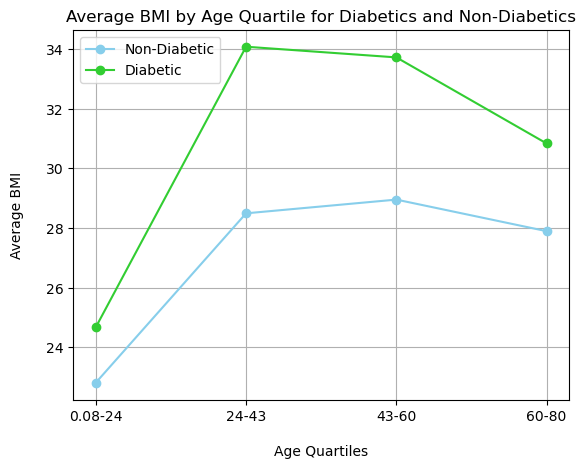

In [26]:
# List Of Average Body Mass Index For Diabetics & Non-Diabetics
diabetes_age_bmi_average = diabetes_data_diabetes.groupby(["Age Quartiles"])["Body Mass Index"].mean().tolist()
ndiabetes_age_bmi_average = diabetes_data_no_diabetes.groupby(["Age Quartiles"])["Body Mass Index"].mean().tolist()

# Visualization Of Mann-Whitney U Test Results, Plot Creation
plt.plot(diabetes_age_bmi_index, ndiabetes_age_bmi_average, label='Non-Diabetic', marker='o', color='skyblue')
plt.plot(diabetes_age_bmi_index, diabetes_age_bmi_average, label='Diabetic', marker='o', color='limegreen')
plt.xlabel('\nAge Quartiles')
plt.ylabel('Average BMI\n')
plt.title('Average BMI by Age Quartile for Diabetics and Non-Diabetics')
plt.legend()
plt.grid(True)
plt.savefig("output_data/avg_bmi_by_age_linegraph.png")
plt.show()

## Relationship of Diabetes Status with Smoking History

### Hypot:
Is the likelihood of having either a current or former smoking history significantly higher for diabetics compared to non-diabetics?

#### Null Hypothesis (H0):
The likelihood of having either a current or former smoking history is the same for both diabetics and non-diabetics.

#### Alternative Hypothesis (H1):
The likelihood of having either a current or former smoking history is significantly higher for diabetics compared to non-diabetics.

In [27]:
# Obtain Smoking History Values For Diabetics 
diabetes_current_smoker_count = grouped_count_data['Current Smoker'][1]
diabetes_former_smoker_count = grouped_count_data['Former Smoker'][1]
diabetes_never_smoker_count = grouped_count_data['Never Smoker'][1]

# Obtain Smoking History Values For Non-Diabetics 
no_diabetes_current_smoker_count = grouped_count_data['Current Smoker'][0]
no_diabetes_former_smoker_count = grouped_count_data['Former Smoker'][0]
no_diabetes_never_smoker_count = grouped_count_data['Never Smoker'][0]

# Create DataFrame With Data
diabetes_smoking_history_df = pd.DataFrame({
    "Current Smoker Count": [no_diabetes_current_smoker_count, diabetes_current_smoker_count],
    "Former Smoker Count": [no_diabetes_former_smoker_count, diabetes_former_smoker_count],
    "Never Smoker Count": [no_diabetes_never_smoker_count, diabetes_never_smoker_count]
})
diabetes_smoking_history_df.index.name = 'Diabetes Status'
diabetes_smoking_history_df

,Current Smoker Count,Former Smoker Count,Never Smoker Count
Diabetes Status,,,
0,8338,13519,35281
1,948,2280,3818


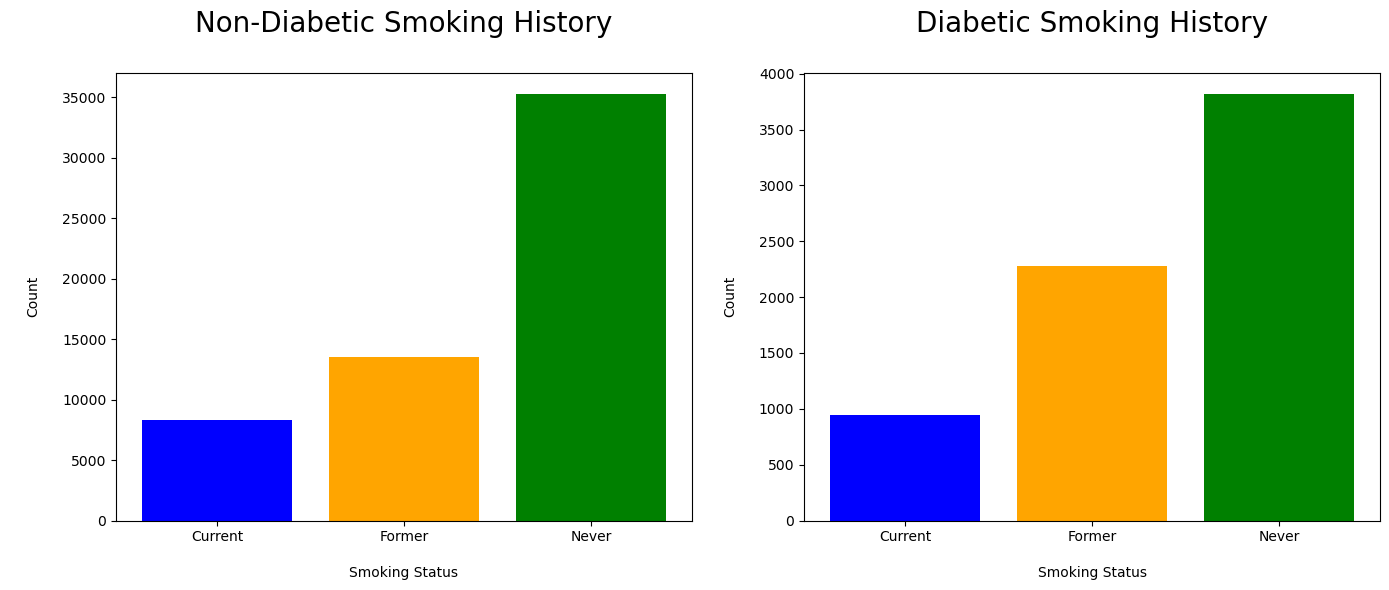

In [28]:
# Diabetic & Non-Diabetic Smoking History Data For Plotting
x_smoking_history = ['Current', 'Former', 'Never']
y_diabetes_smoking_history = [diabetes_current_smoker_count,
                              diabetes_former_smoker_count,
                              diabetes_never_smoker_count]
y_no_diabetes_smoking_history = [no_diabetes_current_smoker_count,
                                 no_diabetes_former_smoker_count,
                                 no_diabetes_never_smoker_count]

# Create Grid For Set Of Subplots
fig_smoking, axes_smoking = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Non-Diabetics Bar Plot For Smoking History
axes_smoking[0].bar(x_smoking_history, y_no_diabetes_smoking_history, color=['blue', 'orange', 'green'], label='Non-Diabetics')
axes_smoking[0].set_title('Non-Diabetic Smoking History\n', fontsize=20)
axes_smoking[0].set_xlabel('\nSmoking Status')
axes_smoking[0].set_ylabel('\nCount\n')

# Diabetics Bar Plot For Smoking History
axes_smoking[1].bar(x_smoking_history, y_diabetes_smoking_history, color=['blue', 'orange', 'green'], label='Diabetics')
axes_smoking[1].set_title('Diabetic Smoking History\n', fontsize=20)
axes_smoking[1].set_xlabel('\nSmoking Status')
axes_smoking[1].set_ylabel('\nCount\n')

# Adjust Layout, Save figure, & Display Plots
plt.tight_layout()
plt.savefig("output_data/smoking_history_barplot.png")
plt.show()

In [29]:
# Create Contingency Table With Smoking History Data
contingency_table_diabetes_smoking = pd.DataFrame({
    'Current': [8338, 948],
    'Former': [13519, 2280],
    'Never': [35281, 3818],
}, index=['Non-Diabetics', 'Diabetics'])

# Perform Chi-Squared Test
chi2_s, p_s, _, _ = chi2_contingency(contingency_table_diabetes_smoking)
print(f"Chi-squared value: {chi2_s}")
print(f"P-value: {p_s}")

# This Test Indicates A Statistically Significant Association Between Diabetes Status & Smoking History
    # Use Visualization To Help Determine Some Directionality, In This Case Through Proportions

Chi-squared value: 257.28084960766034
P-value: 1.3557304734053554e-56


In [30]:
# Smoking History Totals 
diabetes_total_smoker_count = (diabetes_current_smoker_count
                               + diabetes_former_smoker_count
                               + diabetes_never_smoker_count)
no_diabetes_total_smoker_count = (no_diabetes_current_smoker_count
                                  + no_diabetes_former_smoker_count
                                  + no_diabetes_never_smoker_count)

# Create Smoking History Percentages For Diabetics
diabetes_current_smoker_percentage = (diabetes_current_smoker_count / diabetes_total_smoker_count) * 100
diabetes_former_smoker_percentage = (diabetes_former_smoker_count / diabetes_total_smoker_count) * 100
diabetes_never_smoker_percentage = (diabetes_never_smoker_count / diabetes_total_smoker_count) * 100

# Create Smoking History Percentages For Non-Diabetics
no_diabetes_current_smoker_percentage = (no_diabetes_current_smoker_count / no_diabetes_total_smoker_count) * 100
no_diabetes_former_smoker_percentage = (no_diabetes_former_smoker_count / no_diabetes_total_smoker_count) * 100
no_diabetes_never_smoker_percentage = (no_diabetes_never_smoker_count / no_diabetes_total_smoker_count) * 100

# Assemble Diabetic Smoking History Percentages Into List
percentage_diabetes_smoker_history_list = [diabetes_current_smoker_percentage,
                                           diabetes_former_smoker_percentage,
                                           diabetes_never_smoker_percentage]

# Assemble Non-Diabetic Smoking History Percentages Into List
percentage_no_diabetes_smoker_history_list = [no_diabetes_current_smoker_percentage,
                                              no_diabetes_former_smoker_percentage,
                                              no_diabetes_never_smoker_percentage]

# Assemble Into DataFrame
percentage_smoking_history_df_index = ["Current Smoker",
                                       "Former Smoker",
                                       "Never Smoker"]
percentage_smoking_history_df = pd.DataFrame({"Percentages For Diabetics": percentage_diabetes_smoker_history_list,
                                   "Percentages For Non-Diabetics": percentage_no_diabetes_smoker_history_list},
                                   index=percentage_smoking_history_df_index)
percentage_smoking_history_df.index.name = 'Smoking History'


# Display DataFrame
percentage_smoking_history_df

,Percentages For Diabetics,Percentages For Non-Diabetics
Smoking History,,
Current Smoker,13.454442,14.592740
Former Smoker,32.358785,23.660261
Never Smoker,54.186773,61.746998


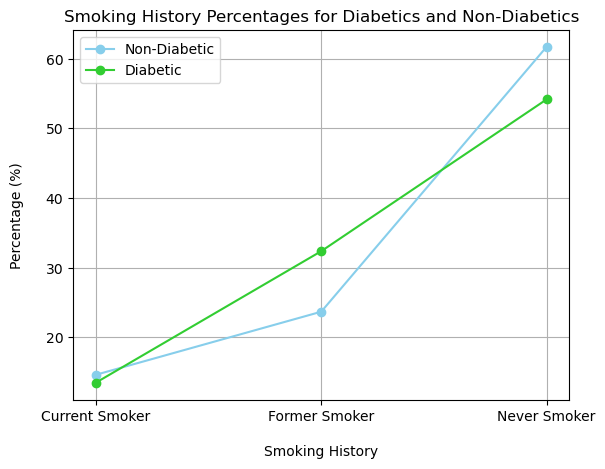

In [31]:
# Visualization Of Smoking History Percentages
plt.plot(percentage_smoking_history_df_index, percentage_no_diabetes_smoker_history_list, label='Non-Diabetic', marker='o', color='skyblue')
plt.plot(percentage_smoking_history_df_index, percentage_diabetes_smoker_history_list, label='Diabetic', marker='o', color='limegreen')
plt.xlabel('\nSmoking History')
plt.ylabel('Percentage (%)\n')
plt.title('Smoking History Percentages for Diabetics and Non-Diabetics')
plt.legend()
plt.grid(True)
plt.savefig("output_data/smoking_history_percentage_linegraph.png")
plt.show()

# While Current Smoking Status Is Fairly Similar, Former & Never Smoking Statuses Are Different
    # Chi-Square Testing Indicates Statistically Significant Association Between Diabetes Status & Smoking History
    # In Context Of Alternative Hypothesis, Former Smoking Status Is Significantly Higher For Diabetics Than Non-Diabetics